In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [ ]:
font_path="/System/Library/Fonts/Supplemental/AppleMyungjo.ttf"
font_prop = fm.FontProperties(fname=font_path).get_name()
print(font_prop)
matplotlib.rc('font', family=font_prop)

AppleMyungjo


In [ ]:
# 인구현황.csv 로드하여 DataFrame 객체생성 , 변수명은 df_all 
df_all=pd.read_csv("data/인구현황.csv")
df_all.head()

,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,1000000000,전국,51217221,24118928,2.12,25498324,25718897,0.99
1,1100000000,서울특별시,9331828,4482063,2.08,4505355,4826473,0.93
2,2600000000,부산광역시,3266598,1570403,2.08,1589912,1676686,0.95
3,2700000000,대구광역시,2363629,1104130,2.14,1159601,1204028,0.96
4,2800000000,인천광역시,3021010,1373827,2.20,1509243,1511767,1.00


In [ ]:
# 전국 데이터는 제거하고 새로운 DataFrame 생성, 변수명은 df
df = df_all.loc[df_all['행정기관'] != '전국'].copy()
df.head()

,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
1,1100000000,서울특별시,9331828,4482063,2.08,4505355,4826473,0.93
2,2600000000,부산광역시,3266598,1570403,2.08,1589912,1676686,0.95
3,2700000000,대구광역시,2363629,1104130,2.14,1159601,1204028,0.96
4,2800000000,인천광역시,3021010,1373827,2.20,1509243,1511767,1.00
5,2900000000,광주광역시,1408422,658075,2.14,695224,713198,0.97


In [ ]:
print("\n결측치 확인:")
print(df.isnull().sum())


결측치 확인:
행정기관코드    0
행정기관      0
총인구수      0
세대수       0
세대당 인구    0
남자 인구수    0
여자 인구수    0
남여 비율     0
dtype: int64


##### 1. 지역별 총인구수 Top5


In [ ]:
print("1. 지역별 총인구수 Top5")
df[["행정기관", "총인구수"]].sort_values(by="총인구수", ascending=False).head(5)

# df.loc[:, ["행정기관", "총인구수"]].sort_values(by="총인구수", ascending=False).head(5)

1. 지역별 총인구수 Top5


,행정기관,총인구수
9,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
16,경상남도,3228380
4,인천광역시,3021010


##### 1-1. 지역별 총인구수 Plot

<Figure size 1000x500 with 0 Axes>

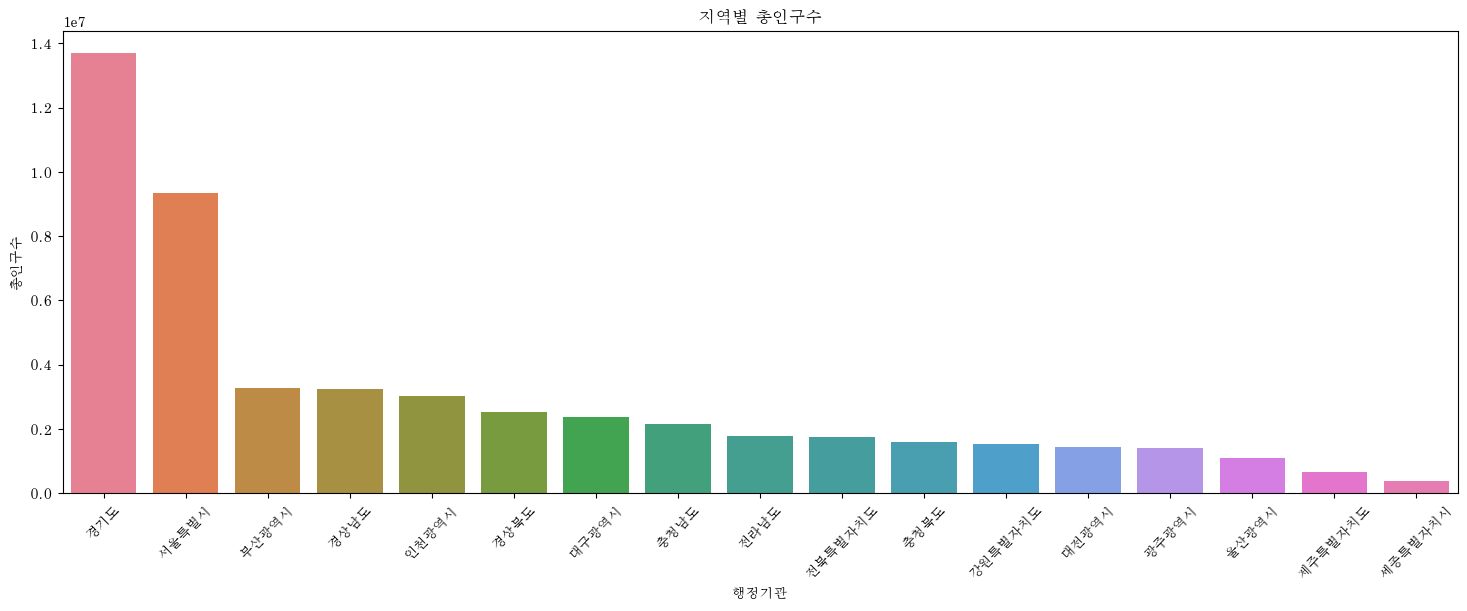

In [ ]:
plt.figure(figsize=(10, 5))
# seaborn의 barplot() 함수사용
figure, axes1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 6)

sns.barplot(data=df.sort_values(by="총인구수", ascending=False),
            x="행정기관", y="총인구수", ax=axes1, hue="행정기관")

plt.xticks(rotation=45)
plt.title('지역별 총인구수')
# plt.tight_layout()
plt.show()

##### 2. 세대당 인구수 높은 지역 Top5

In [ ]:
print("2. 세대당 인구수 높은 지역 Top5")
df.loc[:, ["행정기관", "세대당 인구"]].sort_values(
    by="세대당 인구", ascending=False).head(5).reset_index(drop=True)

2. 세대당 인구수 높은 지역 Top5


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14


##### 2-1. 지역별 세대당 인구 Plot

<Figure size 1000x500 with 0 Axes>

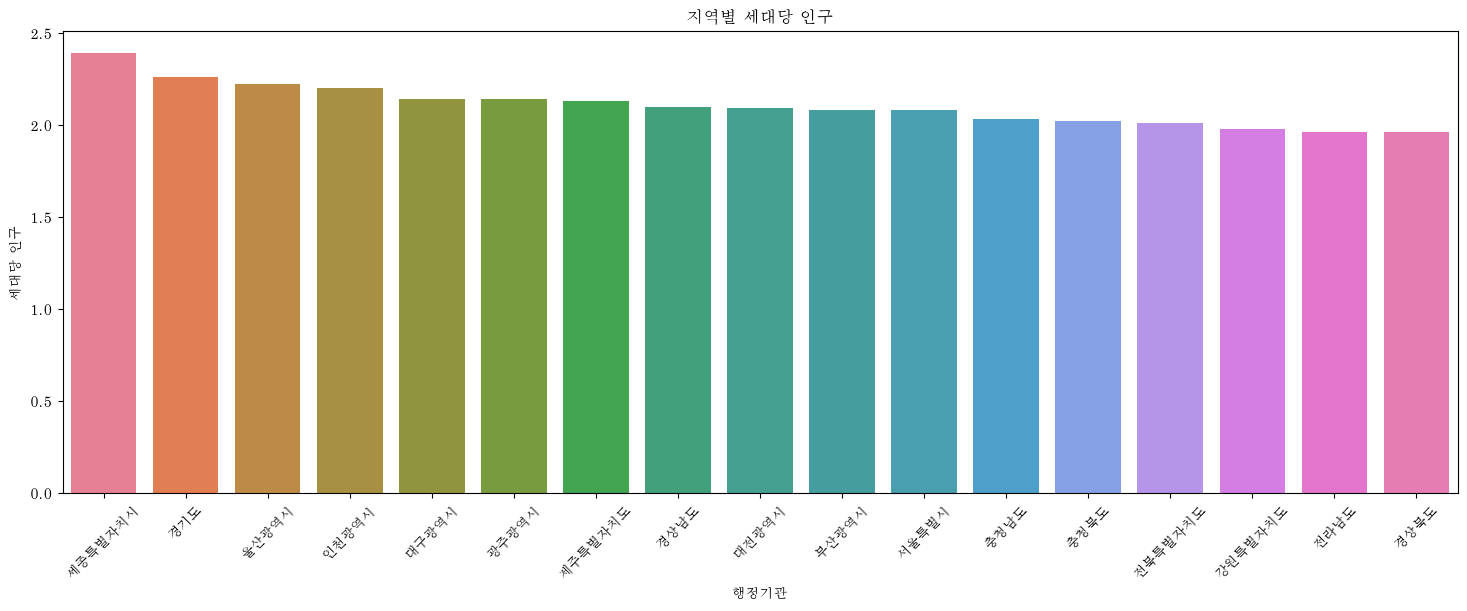

In [ ]:
plt.figure(figsize=(10, 5))
# seaborn의 barplot() 함수사용
figure2, axes2 = plt.subplots(nrows=1, ncols=1)
figure2.set_size_inches(18, 6)

sns.barplot(data=df.sort_values(by="세대당 인구", ascending=False),
            x="행정기관", y="세대당 인구", ax=axes2, hue="행정기관")

plt.xticks(rotation=45)
plt.title('지역별 세대당 인구')
# plt.tight_layout()
plt.show()

##### 3. 남녀 비율 분석

In [ ]:
print("3. 남녀 비율 분석")

df[["행정기관","남여 비율"]].sort_values(by="남여 비율",ascending=False).reset_index(drop=True)


3. 남녀 비율 분석


,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,경상남도,1.02
4,경상북도,1.02
5,전라남도,1.02
6,경기도,1.01
7,강원특별자치도,1.01
8,제주특별자치도,1.00
9,인천광역시,1.00


##### 3-1. 지역별 남녀 비율 Plot
* 기준이 되는 빨간선은 pyplot의 axhline() 함수를 사용해 보세요.

<Figure size 1000x500 with 0 Axes>

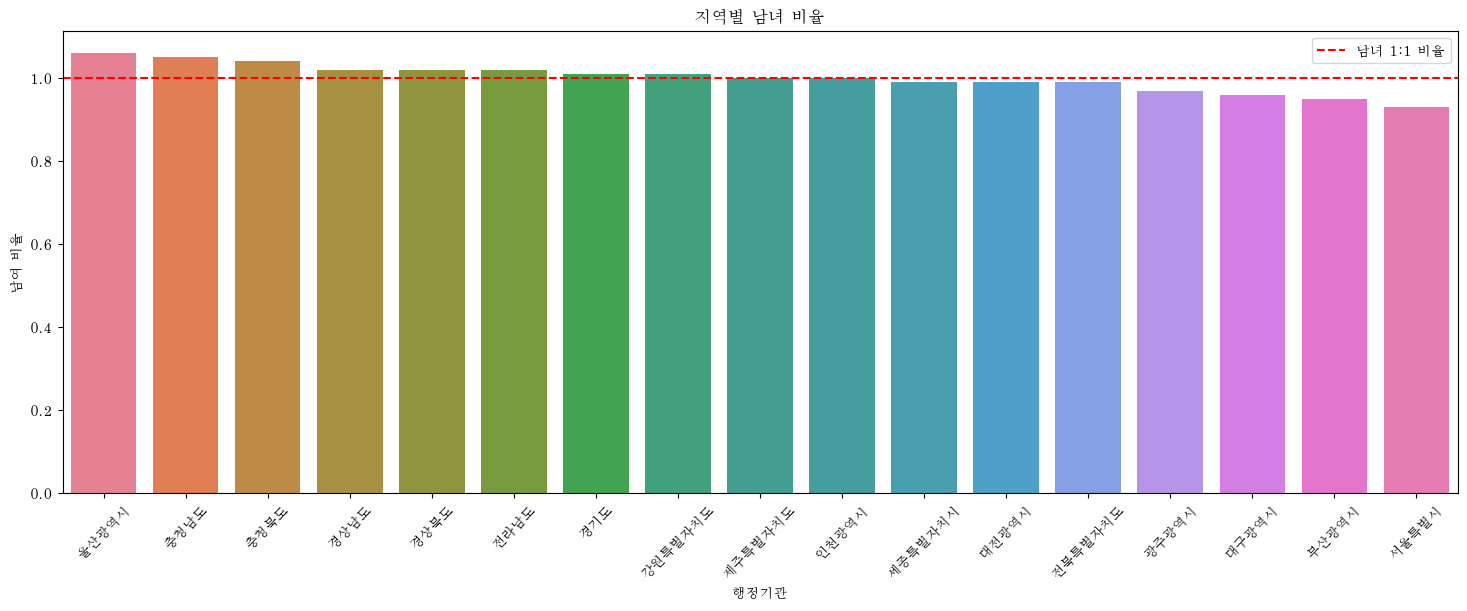

In [ ]:
plt.figure(figsize=(10, 5))
# seaborn의 barplot() 함수사용
figure3, axes3 = plt.subplots(nrows=1, ncols=1)
figure3.set_size_inches(18, 6)

sns.barplot(data=df.sort_values(by="남여 비율", ascending=False),
            x="행정기관", y="남여 비율", ax=axes3, hue="행정기관")


plt.axhline(y=1.0,color="red",linestyle="--",label="남녀 1:1 비율")
plt.xticks(rotation=45)
plt.title('지역별 남녀 비율')
# plt.tight_layout()
plt.legend(loc="upper right")
plt.show()




##### 4. 남자초과 / 여자초과 분석
* 남초(남자초과) => 남자 인구가 여자 인구보다 많은 지역	남여 비율 > 1 또는 남자 인구수 > 여자 인구수
* 여초(여자초과) => 여자 인구가 남자 인구보다 많은 지역	남여 비율 < 1 또는 여자 인구수 > 남자 인구수

* 남초여초 컬럼을 추가합니다. 

In [ ]:
print("4. 남초 vs 여초 지역 구분")

df["남초여초"] = df["남여 비율"].map(lambda x: "남초" if x > 1 else ("여초" if x < 1 else "동일"))

df.loc[:,["행정기관","남여 비율","남초여초"]]

4. 남초 vs 여초 지역 구분


,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,남초여초
1,1100000000,서울특별시,9331828,4482063,2.08,4505355,4826473,0.93,여초
2,2600000000,부산광역시,3266598,1570403,2.08,1589912,1676686,0.95,여초
3,2700000000,대구광역시,2363629,1104130,2.14,1159601,1204028,0.96,여초
4,2800000000,인천광역시,3021010,1373827,2.20,1509243,1511767,1.00,동일
5,2900000000,광주광역시,1408422,658075,2.14,695224,713198,0.97,여초
6,3000000000,대전광역시,1439157,687757,2.09,717291,721866,0.99,여초
7,3100000000,울산광역시,1098049,495378,2.22,564888,533161,1.06,남초
8,3600000000,세종특별자치시,390685,163432,2.39,194413,196272,0.99,여초
9,4100000000,경기도,13694685,6058202,2.26,6882186,6812499,1.01,남초
10,5100000000,강원특별자치도,1517766,764834,1.98,763025,754741,1.01,남초


##### 5. 세대당 인구 평균보다 높은 지역

In [ ]:
print("5. 세대당 인구 평균보다 높은 지역")

df.loc[df["세대당 인구"] > 2.11, ["행정기관", "세대당 인구"]].sort_values(by="세대당 인구",ascending=False).reset_index(drop=True)


5. 세대당 인구 평균보다 높은 지역


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14
5,광주광역시,2.14
6,제주특별자치도,2.13


##### 5-1. 남초 vs 여초 개수 Plot  /  지역별 세대수 Plot

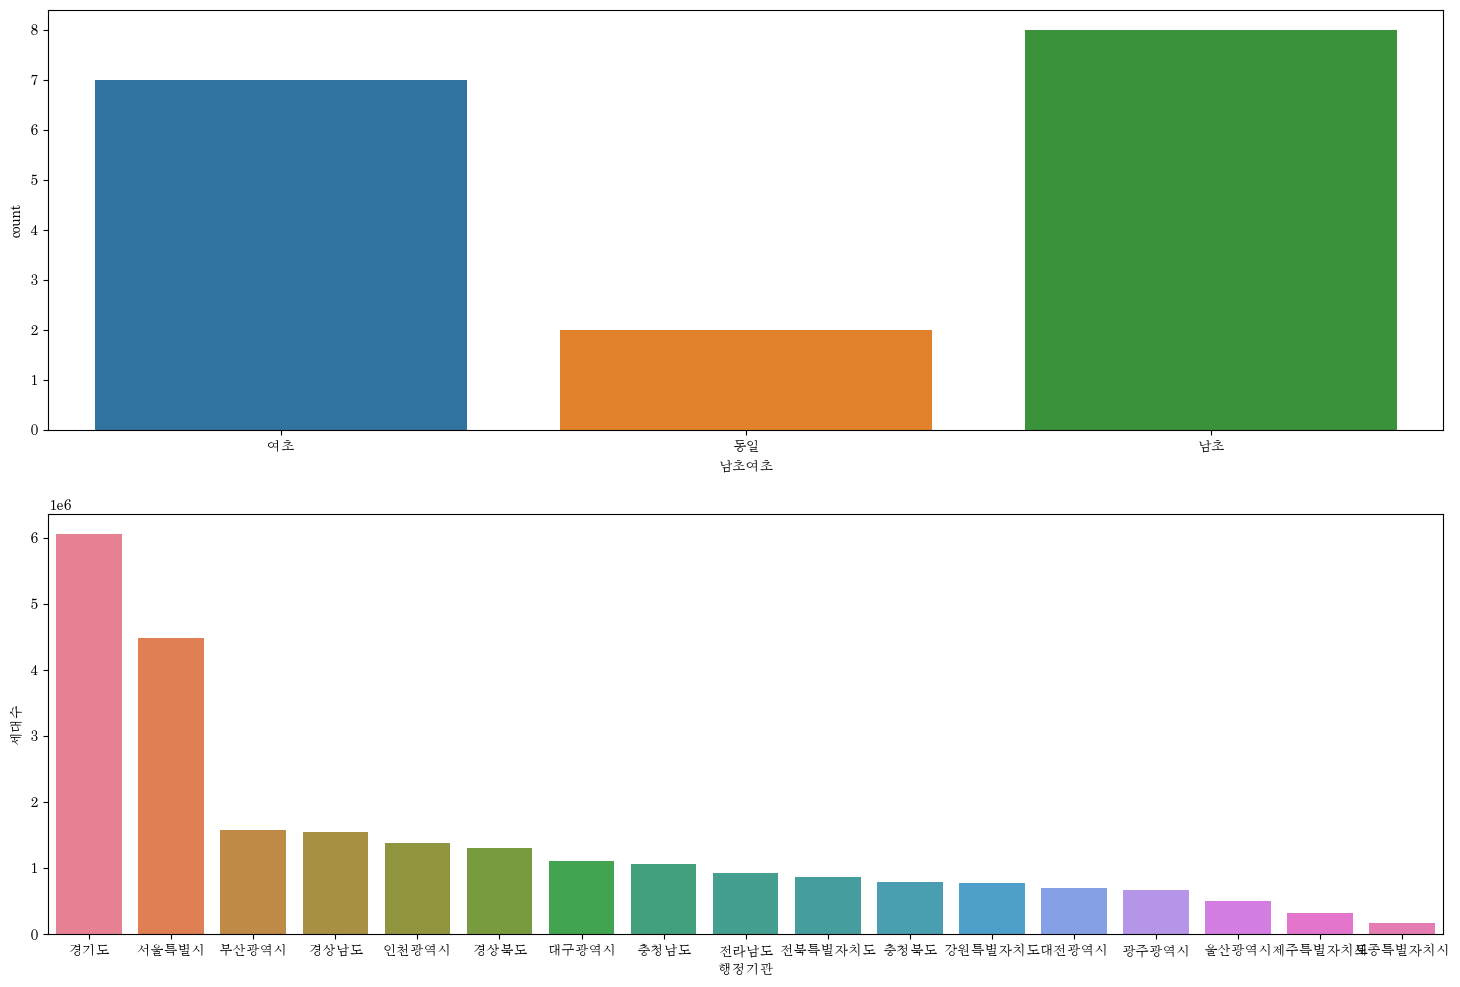

In [ ]:
# subplots() 함수를 사용하여 axes 객체를 생성하기
figure4, (axes4, axes5) = plt.subplots(nrows=2, ncols=1)
figure4.set_size_inches(18, 12)
# seaborn의 barplot() 함수 호출하기 - 행정구역과 인구수

sns.countplot(data=df,x="남초여초",ax=axes4,hue="남초여초")

sns.barplot(data=df.sort_values("세대수",ascending=False),x="행정기관",y="세대수",hue="행정기관")


plt.show()

##### 6. 남자 인구 vs 여자 인구 비교 Plot

<Axes: xlabel='행정기관', ylabel='인구 수'>

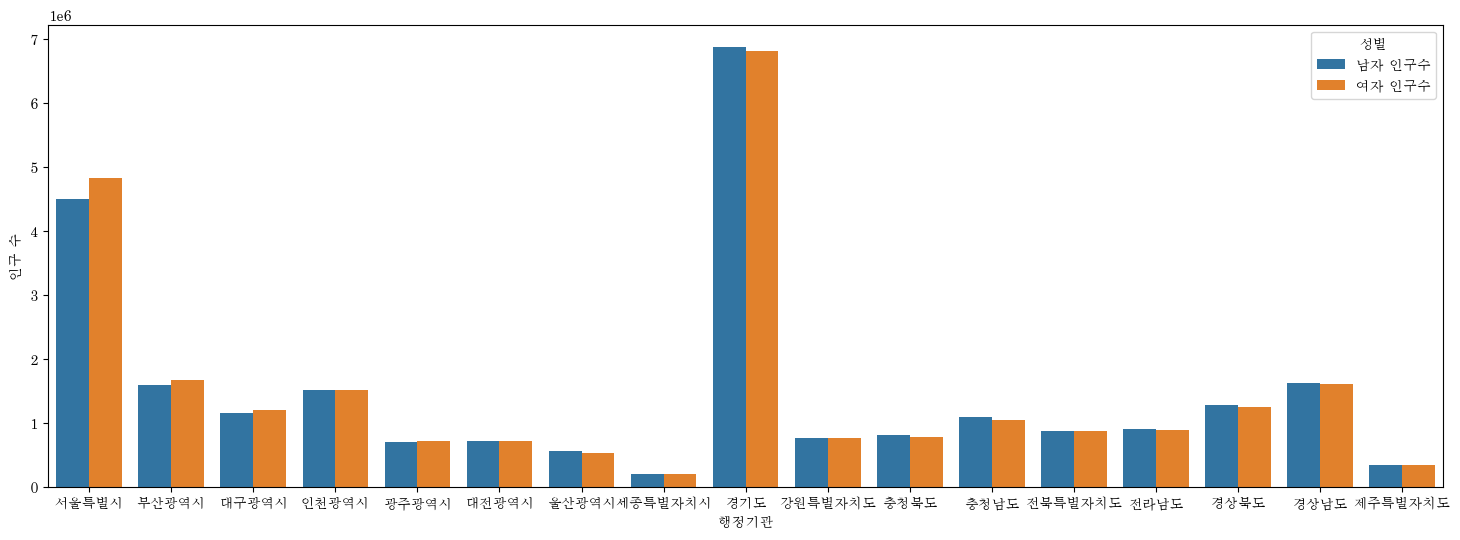

In [ ]:
figure5,axes6=plt.subplots(nrows=1,ncols=1)
figure5.set_size_inches(18,6)

df_melted = df.melt(id_vars="행정기관", value_vars=["남자 인구수", "여자 인구수"],
                    var_name="성별", value_name="인구 수")
sns.barplot(data=df_melted, x="행정기관", y="인구 수", hue="성별")


### 엑셀 리포트 자동 생성 코드

In [ ]:
# 엑셀 저장용
from pandas import ExcelWriter
import datetime

# 분석 데이터 준비
top5_population = df[['행정기관', '총인구수']].sort_values(by='총인구수', ascending=False).head(5)
top5_family = df[['행정기관', '세대당 인구']].sort_values(by='세대당 인구', ascending=False).head(5)
male_vs_female = df[['행정기관', '남자 인구수', '여자 인구수']]

# 남초/여초 컬럼 추가
df['남초여초'] = df['남여 비율'].apply(lambda x: '남초' if x > 1 else ('여초' if x < 1 else '동일'))

today = datetime.datetime.now().strftime('%Y%m%d')
filename = f'data/인구분석리포트_{today}.xlsx'

# Excel 파일로 저장
with ExcelWriter(filename, engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name='원본데이터', index=False)
    top5_population.to_excel(writer, sheet_name='총인구 Top5', index=False)
    top5_family.to_excel(writer, sheet_name='세대당 인구 Top5', index=False)
    male_vs_female.to_excel(writer, sheet_name='남자vs여자', index=False)
    
print("엑셀 리포트 저장 완료 → '인구분석리포트.xlsx'")


엑셀 리포트 저장 완료 → '인구분석리포트.xlsx'


In [ ]:
# 남녀 인구 차이 컬럼 추가
df['남여차이'] = abs(df['남자 인구수'] - df['여자 인구수'])

# 남녀 비율 TOP5 (남초)
male_dom = df.sort_values(by='남여 비율', ascending=False).head(5)

# 남녀 비율 TOP5 (여초)
female_dom = df.sort_values(by='남여 비율', ascending=True).head(5)

# 세대당 인구 TOP5 (가구당 인구 많은 지역)
big_family = df.sort_values(by='세대당 인구', ascending=False).head(5)

# 세대수 대비 총인구 비율
df['인구/세대'] = df['총인구수'] / df['세대수']

# 수도권 vs 비수도권 비교
capital = df[df['행정기관'].isin(['서울특별시', '경기도', '인천광역시'])]
non_capital = df[~df['행정기관'].isin(['서울특별시', '경기도', '인천광역시'])]


In [ ]:

print("남초 TOP5")
male_dom[['행정기관','남여 비율']].reset_index(drop=True)


남초 TOP5


,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,경상남도,1.02
4,경상북도,1.02


In [ ]:

print("여초 TOP5")
female_dom[['행정기관','남여 비율']].reset_index(drop=True)


여초 TOP5


,행정기관,남여 비율
0,서울특별시,0.93
1,부산광역시,0.95
2,대구광역시,0.96
3,광주광역시,0.97
4,전북특별자치도,0.99


In [ ]:

print("세대당 인구 많은 TOP5")
big_family[['행정기관','세대당 인구']].reset_index(drop=True)


세대당 인구 많은 TOP5


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14


In [ ]:

print("수도권 평균 세대당 인구:", capital['세대당 인구'].mean())
print("비수도권 평균 세대당 인구:", non_capital['세대당 인구'].mean())

수도권 평균 세대당 인구: 2.18
비수도권 평균 세대당 인구: 2.0892857142857144


In [ ]:
# 전국 총인구수
total_population = df_all[df_all['행정기관'] == '전국']['총인구수'].values[0]

# 인구비율(%) 컬럼 추가하기
df['인구비율(%)'] = df['총인구수'] / total_population * 100

df

,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,남초여초,인구비율(%)
1,1100000000,서울특별시,9331828,4482063,2.08,4505355,4826473,0.93,여초,18.220098
2,2600000000,부산광역시,3266598,1570403,2.08,1589912,1676686,0.95,여초,6.377929
3,2700000000,대구광역시,2363629,1104130,2.14,1159601,1204028,0.96,여초,4.614911
4,2800000000,인천광역시,3021010,1373827,2.20,1509243,1511767,1.00,여초,5.898426
5,2900000000,광주광역시,1408422,658075,2.14,695224,713198,0.97,여초,2.749899
6,3000000000,대전광역시,1439157,687757,2.09,717291,721866,0.99,여초,2.809908
7,3100000000,울산광역시,1098049,495378,2.22,564888,533161,1.06,남초,2.143906
8,3600000000,세종특별자치시,390685,163432,2.39,194413,196272,0.99,여초,0.762800
9,4100000000,경기도,13694685,6058202,2.26,6882186,6812499,1.01,남초,26.738438
10,5100000000,강원특별자치도,1517766,764834,1.98,763025,754741,1.01,남초,2.963390


In [ ]:
# 전국 제외
df_plot = df.sort_values(by='인구비율(%)', ascending=False)
df_plot

,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,남초여초,인구비율(%)
9,4100000000,경기도,13694685,6058202,2.26,6882186,6812499,1.01,남초,26.738438
1,1100000000,서울특별시,9331828,4482063,2.08,4505355,4826473,0.93,여초,18.220098
2,2600000000,부산광역시,3266598,1570403,2.08,1589912,1676686,0.95,여초,6.377929
16,4800000000,경상남도,3228380,1537492,2.10,1626926,1601454,1.02,남초,6.303310
4,2800000000,인천광역시,3021010,1373827,2.20,1509243,1511767,1.00,여초,5.898426
15,4700000000,경상북도,2531384,1291568,1.96,1280547,1250837,1.02,남초,4.942447
3,2700000000,대구광역시,2363629,1104130,2.14,1159601,1204028,0.96,여초,4.614911
12,4400000000,충청남도,2136574,1052129,2.03,1096128,1040446,1.05,남초,4.171593
14,4600000000,전라남도,1788819,912412,1.96,902380,886439,1.02,남초,3.492612
13,5200000000,전북특별자치도,1738690,864608,2.01,866030,872660,0.99,여초,3.394737


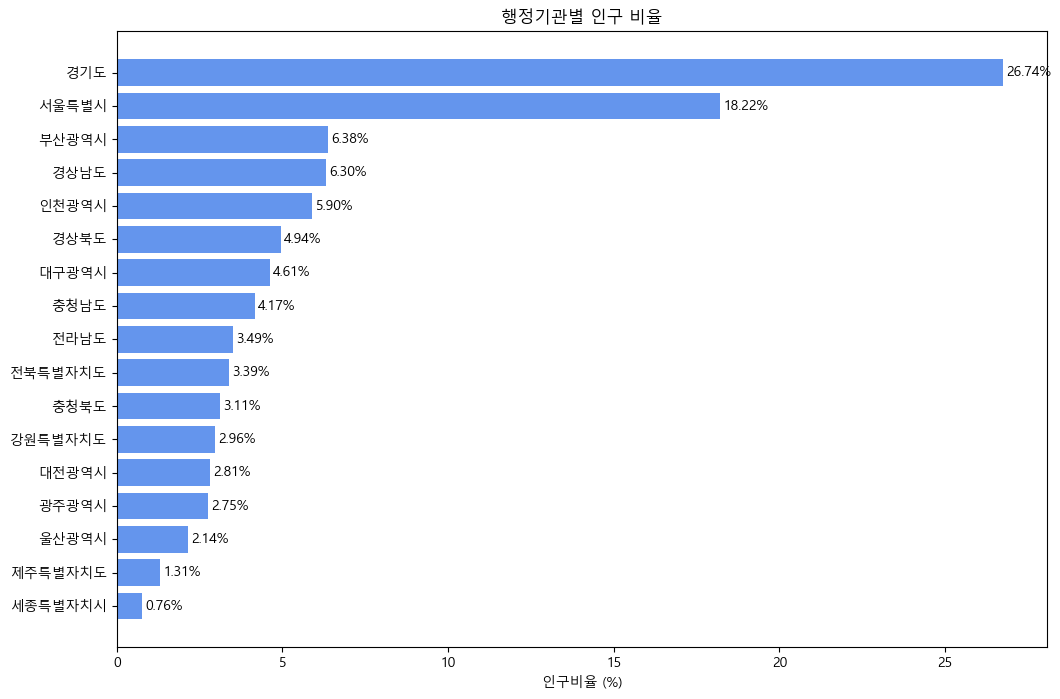

In [ ]:

# 시각화
plt.figure(figsize=(12, 8))
bars = plt.barh(df_plot['행정기관'], df_plot['인구비율(%)'], color='cornflowerblue')

plt.xlabel('인구비율 (%)')
plt.title('행정기관별 인구 비율')

# 값 표시
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.2f}%", va='center')

plt.gca().invert_yaxis()
plt.show()